In [15]:
import numpy as np
import pandas as pd
import datetime as dt

In [16]:
#reading event.json and creating pandas dataframe
import pandas as pd
events_df = pd.read_json('../events.json')
events_df_reorganized=pd.DataFrame(list(events_df["events"]))
events_df_reorganized.head()

,event,sessionid,eventtime,price,productid
0,cart,a0655eee-1267-4820-af21-ad8ac068ff7a,2020-06-01T08:59:16.406Z,14.48,HBV00000NVZE8
1,cart,d2ea7bd3-9235-4a9f-a9ea-d7f296e71318,2020-06-01T08:59:46.580Z,49.90,HBV00000U2B18
2,cart,5e594788-78a0-44dd-8e66-37022d48f691,2020-06-01T08:59:33.308Z,1.99,OFIS3101-080
3,cart,fdfeb652-22fa-4153-b9b5-4dfa0dcaffdf,2020-06-01T08:59:31.911Z,2.25,HBV00000NVZBW
4,cart,9e9d4f7e-898c-40fb-aae9-256c40779933,2020-06-01T08:59:33.888Z,9.95,HBV00000NE0T4


In [17]:
#deleting rows that contain None elements
events_df_reorganized=events_df_reorganized.mask(events_df_reorganized.eq('None')).dropna()
events_df_reorganized.head()

,event,sessionid,eventtime,price,productid
0,cart,a0655eee-1267-4820-af21-ad8ac068ff7a,2020-06-01T08:59:16.406Z,14.48,HBV00000NVZE8
1,cart,d2ea7bd3-9235-4a9f-a9ea-d7f296e71318,2020-06-01T08:59:46.580Z,49.90,HBV00000U2B18
2,cart,5e594788-78a0-44dd-8e66-37022d48f691,2020-06-01T08:59:33.308Z,1.99,OFIS3101-080
3,cart,fdfeb652-22fa-4153-b9b5-4dfa0dcaffdf,2020-06-01T08:59:31.911Z,2.25,HBV00000NVZBW
4,cart,9e9d4f7e-898c-40fb-aae9-256c40779933,2020-06-01T08:59:33.888Z,9.95,HBV00000NE0T4


In [18]:
#reading meta.json and creating pandas dataframe
meta_df = pd.read_json('../meta.json')
meta_df_reorganized = pd.DataFrame(list(meta_df["meta"]))

In [19]:
#deleting rows that contain None elements
meta_df_reorganized=meta_df_reorganized.mask(meta_df_reorganized.eq('None')).dropna()
meta_df_reorganized.head()

,productid,brand,category,subcategory,name
0,HBV00000AX6LR,Palette,Kişisel Bakım,Saç Bakımı,Palette Kalıcı Doğal Renkler 10-4 PAPATYA
1,HBV00000BSAQG,Best,Pet Shop,Kedi,Best Pet Jöle İçinde Parça Etli Somonlu Konser...
2,HBV00000JUHBA,Tarım Kredi,Temel Gıda,"Bakliyat, Pirinç, Makarna",Türkiye Tarım Kredi Koop.Yeşil Mercimek 1 kg
3,HBV00000NE0QI,Namet,"Et, Balık, Şarküteri",Şarküteri,Namet Fıstıklı Macar Salam 100 gr
4,HBV00000NE0UQ,Muratbey,Kahvaltılık ve Süt,Peynir,Muratbey Burgu Peyniri 250 gr


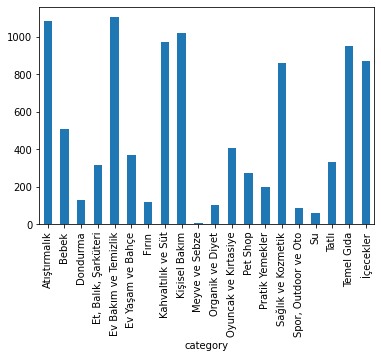

In [20]:
#Distribution of products in metadata according to category information
import matplotlib.pyplot as plt
serie=meta_df_reorganized.groupby('category')['category'].count()
serie.plot.bar()

plt.show()

In [21]:
#since there are so little products for Meyve ve Sebze category, I didnt use these products to create recommender systems
meta_df_reorganized=meta_df_reorganized.loc[meta_df_reorganized['category'] != 'Meyve ve Sebze']
meta_df_reorganized.head()

,productid,brand,category,subcategory,name
0,HBV00000AX6LR,Palette,Kişisel Bakım,Saç Bakımı,Palette Kalıcı Doğal Renkler 10-4 PAPATYA
1,HBV00000BSAQG,Best,Pet Shop,Kedi,Best Pet Jöle İçinde Parça Etli Somonlu Konser...
2,HBV00000JUHBA,Tarım Kredi,Temel Gıda,"Bakliyat, Pirinç, Makarna",Türkiye Tarım Kredi Koop.Yeşil Mercimek 1 kg
3,HBV00000NE0QI,Namet,"Et, Balık, Şarküteri",Şarküteri,Namet Fıstıklı Macar Salam 100 gr
4,HBV00000NE0UQ,Muratbey,Kahvaltılık ve Süt,Peynir,Muratbey Burgu Peyniri 250 gr


In [22]:
#after these preprocess, we have to make sure event data doesnt contain more product than meta data
#If this situation happen, we should delete these extra items from event data

In [23]:
meta=list(set(meta_df_reorganized["productid"].values))
event=list(set(events_df_reorganized["productid"].values))

In [24]:
fark=list(set(event) - set(meta))
print(fark)

['HBV00000OEL9M', 'HBV00000NVZAC', 'HBV00000P7QJQ', 'HBV00000O2SES', 'HBV00000NVZGK', 'HBV00000OELA8', 'HBV00000O2SFG', 'HBV00000NVZDS', 'HBV00000OEL9I', 'HBV00000PV94C', 'HBV00000NVZ8L', 'HBV00000O2SDQ', 'HBV00000OE7GO', 'HBV00000OELBY', 'HBV00000O2S7F', 'HBV00000O2SFU', 'HBV00000O3C6Z', 'HBV00000U276B', 'HBV00000OE7HX', 'HBV00000SP6XH', 'HBV00000OE855', 'HBV00000TIRUD', 'HBV00000O2S2J', 'HBV00000OELD6', 'HBV00000NVZG6', 'HBV00000O2SGO', 'HBV00000O2SE0', 'HBV00000OE82P', 'HBV00000SP852', 'HBV00000NVZDK', 'HBV00000QU443', 'HBV00000OEL8E', 'HBV00000OELBU', 'HBV00000O2SE8', 'HBV00000PV904', 'HBV00000PQLVV', 'HBV00000O2SJH', 'HBV00000NVZGU', 'HBV00000QUFR0', 'HBV00000PVBW2', 'HBV00000O2SBX', 'HBV00000OE7VI', 'HBV00000OE7B5', 'HBV00000OE7RL', 'HBV00000OEL9Q', 'HBV00000O2SCZ', 'HBV00000U2767', 'HBV00000OELDM', 'HBV00000UOI79', 'HBV00000O3C7B', 'HBV00000OELEO', 'HBV00000PV9DP', 'HBV00000PNGHM', 'HBV00000OE7V9', 'HBV00000PQLVZ', 'HBV00000PNGHS', 'HBV00000PUQBD', 'HBV00000NVZ9U', 'HBV00000PNGH

In [25]:
#deleting rows that contain items that meta data doesnt contain  anymore
for i in range(len(fark)):
    events_df_reorganized.drop(events_df_reorganized.index[(events_df_reorganized["productid"] == fark[i])],axis=0,inplace=True)

In [26]:
#checking if there is still an item that meta data doesnt contain  anymore
meta=list(set(meta_df_reorganized["productid"].values))
event=list(set(events_df_reorganized["productid"].values))
fark=list(set(event) - set(meta))
print(fark)

[]


In [27]:
#checking illegal cases (e.g check if there is any negative price)
events_df_reorganized["price"] = events_df_reorganized["price"].astype(float)
print(events_df_reorganized.shape)
events_df_reorganized.drop(events_df_reorganized.index[(events_df_reorganized["price"] <= 0 )],axis=0,inplace=True)
print(events_df_reorganized.shape)

(255499, 5)
(255499, 5)


In [28]:
#since event columns variance is 0 (each entry in column is same) , event column dropped
#In session-based and content-based recommender, I didn't utilized price information, price columnn dropped
#Converting eventtime column to more easy format, to make comprasion and observion easier
#After conversion, time column created and eventtime dropped
events_df_reorganized = events_df_reorganized.drop(columns="event")
events_df_reorganized = events_df_reorganized.drop(columns="price")
events_df_reorganized['time']=events_df_reorganized['eventtime'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ').timestamp())
events_df_reorganized = events_df_reorganized.drop(columns="eventtime")
events_df_reorganized.head()

,sessionid,productid,time
1,d2ea7bd3-9235-4a9f-a9ea-d7f296e71318,HBV00000U2B18,1.590991e+09
2,5e594788-78a0-44dd-8e66-37022d48f691,OFIS3101-080,1.590991e+09
4,9e9d4f7e-898c-40fb-aae9-256c40779933,HBV00000NE0T4,1.590991e+09
5,9e9d4f7e-898c-40fb-aae9-256c40779933,HBV00000NE0T6,1.590991e+09
7,bf3a141e-ed91-4dfa-b4e1-de5aadf61d97,HBV00000U2B4I,1.590991e+09


In [29]:
#Handling rare and useless cases
#1.Delete session informations' that bought only one item
print(events_df_reorganized.shape)
session_lengths = events_df_reorganized.groupby('sessionid').size()
events_df_reorganized = events_df_reorganized[np.in1d(events_df_reorganized.sessionid, session_lengths[session_lengths>1].index)]
print(events_df_reorganized.shape)

(255499, 3)
(242802, 3)


In [30]:
#2.Delete session informations' that bought unpopular items (items that bought by less than 5 sessions)
#After 2nd step, rechecking session informations.Delete session informations' that bought only one item
print(events_df_reorganized.shape)
item_supports = events_df_reorganized.groupby('productid').size()
events_df_reorganized = events_df_reorganized[np.in1d(events_df_reorganized.productid, item_supports[item_supports>=5].index)]
session_lengths = events_df_reorganized.groupby('sessionid').size()
events_df_reorganized = events_df_reorganized[np.in1d(events_df_reorganized.sessionid, session_lengths[session_lengths>=2].index)]

print(events_df_reorganized.shape)

(242802, 3)
(234604, 3)


In [32]:
#last check
meta=list(set(meta_df_reorganized["productid"].values))
event=list(set(events_df_reorganized["productid"].values))
print(len(meta))
print(len(event))
fark=list(set(event) - set(meta))
print(fark)

9773
6052
[]


In [33]:
events_df_reorganized.to_csv("../events_df_reorganized.csv", sep=',', encoding='utf-8')
meta_df_reorganized.to_csv("../meta_df_reorganized.csv", sep=',', encoding='utf-8')